In [ ]:
#Solution for data in motion data analysis challenge 20


In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
shares=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")



In [5]:
shares.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Check out the type of the columns


In [6]:
shares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


## Transform the Date column as a datetime type

In [7]:
#use pd.to_datetime to chane the data type
shares['Date']=pd.to_datetime(shares['Date'])

## Set the date as the index

In [8]:
shares.set_index('Date')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


## Is there any duplicate dates?

In [9]:
#use duplicated() to check for duplicates. subset-->column name 
duplicates = shares[shares.duplicated(subset='Date')]
if duplicates.empty==True:
    print("No duplicate dates")
else:
    print(duplicates)

No duplicate dates


## Sort the index so the first entry is the oldest date

In [10]:
#sorting in descending order
shares=shares.sort_index(ascending=False)
shares.head()

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


## Get the last business day of each month

In [11]:
#create month coloumn using dt.month
shares['Month']=shares['Date'].dt.month

#create year column using dt.year
shares['Year']=shares['Date'].dt.year

#group by year and month. use agg function to get max of the date
last_business_day=shares.groupby(['Year','Month']).agg({'Date':max})
print(last_business_day)

                 Date
Year Month           
1980 12    1980-12-31
1981 1     1981-01-30
     2     1981-02-27
     3     1981-03-31
     4     1981-04-30
...               ...
2014 3     2014-03-31
     4     2014-04-30
     5     2014-05-30
     6     2014-06-30
     7     2014-07-08

[404 rows x 1 columns]


## What is the difference in days between the first day and the oldest

In [12]:
#max of date minus min of date. get only the days with .days 
#use ()for the whole thing for .days to be applied
difference=(max(shares['Date'])-min(shares['Date'])).days

print(f'No of days between first day and the oldest is {difference} days')

No of days between first day and the oldest is 12261 days


## How many months in the data we have?

In [13]:
#way 1
# create new data set by droping duplicates
num_months=shares[['Year','Month']].drop_duplicates()

#find no of rows and columns
counts=num_months.shape

print(f'Number of months: {counts[0]}')

Number of months: 404


In [14]:
#way 2
#group by year and month and find the size
num_months=shares.groupby(['Year','Month']).size()

#get no of rows with length
print(f'Number of months: {len(num_months)}')

Number of months: 404


## Plot the 'Adj Close' value

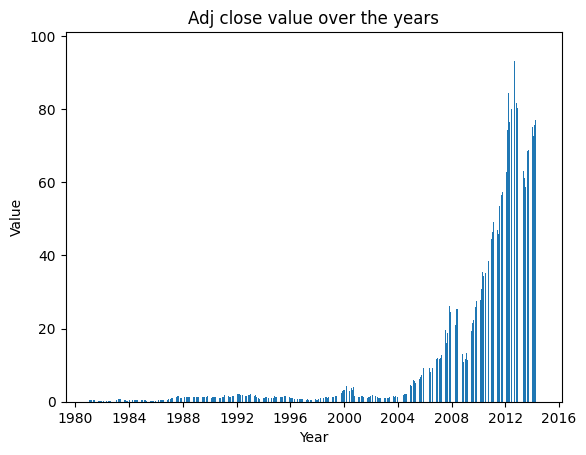

In [15]:
plt.bar(shares['Date'], shares['Adj Close'])
plt.title("Adj close value over the years")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

## plot the lowest and highest value

In [16]:
#new data set, which filters max and min of closing value
newdf = shares[(shares["Close"] ==min(shares['Close'])) | (shares['Close']==max(shares['Close']))]
newdf

,Date,Open,High,Low,Close,Volume,Adj Close,Month,Year
8070,1982-07-08,11.12,11.12,11.00,11.0,41081600,0.17,7,1982
450,2012-09-19,700.26,703.99,699.57,702.1,81718700,96.28,9,2012


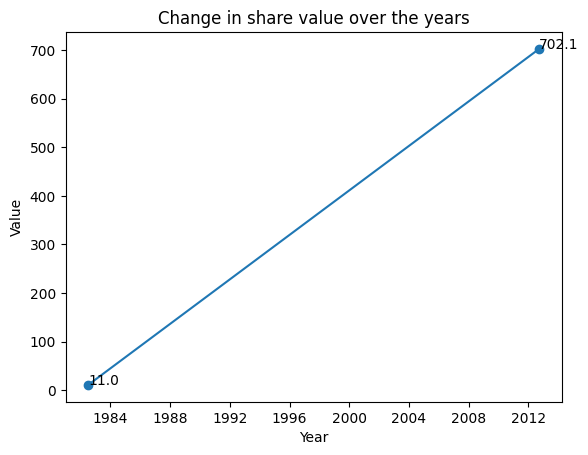

In [22]:
# plot the min and max
plt.plot(newdf['Date'], newdf['Close'], marker='o')
plt.title("Change in share value over the years")
plt.xlabel("Year")
plt.ylabel("Value")
#labeling the values
for i,j in zip(newdf['Date'],newdf['Close']):
    plt.annotate(str(j),xy=(i,j))
plt.show()